In [1]:
import numpy as np
from PIL import Image, ImageFilter
import glob
import re
from statistics import mean, median

In [2]:
IMGS_DIR = "asciis/CascadiaMono/"

In [3]:
img = Image.open(IMGS_DIR + "100.bmp")
img_arr = np.array(img)

img_size = img_arr.size
img_shape = img_arr.shape

print(img_size, img_shape)
# img.filter(ImageFilter.MinFilter(3))
img

288 (24, 12)


In [4]:
img_ls = glob.glob(IMGS_DIR + "*.bmp")
for i in range(0, len(img_ls)):
    img = Image.open(img_ls[i])
    # img = img.filter(ImageFilter.MinFilter(3))
    img = np.array(img)
    char = chr(int(re.findall(r'\d+', img_ls[i])[0]))
    img_ls[i] = (img_ls[i], (img.size - np.count_nonzero(img)) / img.size, char)

img_ls

[('asciis/CascadiaMono\\100.bmp', 0.22916666666666666, 'd'),
 ('asciis/CascadiaMono\\101.bmp', 0.19791666666666666, 'e'),
 ('asciis/CascadiaMono\\102.bmp', 0.18055555555555555, 'f'),
 ('asciis/CascadiaMono\\103.bmp', 0.2604166666666667, 'g'),
 ('asciis/CascadiaMono\\104.bmp', 0.19444444444444445, 'h'),
 ('asciis/CascadiaMono\\105.bmp', 0.17708333333333334, 'i'),
 ('asciis/CascadiaMono\\106.bmp', 0.1840277777777778, 'j'),
 ('asciis/CascadiaMono\\107.bmp', 0.19791666666666666, 'k'),
 ('asciis/CascadiaMono\\108.bmp', 0.1527777777777778, 'l'),
 ('asciis/CascadiaMono\\109.bmp', 0.22569444444444445, 'm'),
 ('asciis/CascadiaMono\\110.bmp', 0.1597222222222222, 'n'),
 ('asciis/CascadiaMono\\111.bmp', 0.18055555555555555, 'o'),
 ('asciis/CascadiaMono\\112.bmp', 0.22569444444444445, 'p'),
 ('asciis/CascadiaMono\\113.bmp', 0.22569444444444445, 'q'),
 ('asciis/CascadiaMono\\114.bmp', 0.1701388888888889, 'r'),
 ('asciis/CascadiaMono\\115.bmp', 0.1701388888888889, 's'),
 ('asciis/CascadiaMono\\116.bm

In [5]:
img_ls.sort(key=lambda a: a[1])

img_ls

[('asciis/CascadiaMono\\32.bmp', 0.0, ' '),
 ('asciis/CascadiaMono\\46.bmp', 0.024305555555555556, '.'),
 ('asciis/CascadiaMono\\96.bmp', 0.034722222222222224, '`'),
 ('asciis/CascadiaMono\\39.bmp', 0.041666666666666664, "'"),
 ('asciis/CascadiaMono\\44.bmp', 0.04861111111111111, ','),
 ('asciis/CascadiaMono\\58.bmp', 0.04861111111111111, ':'),
 ('asciis/CascadiaMono\\45.bmp', 0.06944444444444445, '-'),
 ('asciis/CascadiaMono\\95.bmp', 0.06944444444444445, '_'),
 ('asciis/CascadiaMono\\59.bmp', 0.07291666666666667, ';'),
 ('asciis/CascadiaMono\\34.bmp', 0.08333333333333333, '"'),
 ('asciis/CascadiaMono\\94.bmp', 0.08333333333333333, '^'),
 ('asciis/CascadiaMono\\33.bmp', 0.08680555555555555, '!'),
 ('asciis/CascadiaMono\\126.bmp', 0.09027777777777778, '~'),
 ('asciis/CascadiaMono\\60.bmp', 0.1111111111111111, '<'),
 ('asciis/CascadiaMono\\43.bmp', 0.125, '+'),
 ('asciis/CascadiaMono\\62.bmp', 0.125, '>'),
 ('asciis/CascadiaMono\\42.bmp', 0.1284722222222222, '*'),
 ('asciis/CascadiaMono

In [6]:
img_ls[0], img_ls[0][1] / img_size

(('asciis/CascadiaMono\\32.bmp', 0.0, ' '), 0.0)

In [7]:
median([a[1] for a in img_ls])

0.1840277777777778

In [8]:
mean([a[1] for a in img_ls])

0.1790204678362573

In [9]:
img_ls[-1], img_ls[-1][1] / img_size

(('asciis/CascadiaMono\\36.bmp', 0.3020833333333333, '$'),
 0.0010489004629629629)

In [10]:
brightness_str = ""
for img in img_ls:
    brightness_str += img[2]

brightness_str

' .`\',:-_;"^!~<+>*\\/|=?vxLclTYn1)trsz({Jifo}FI[]j3C7XuVhyekSZa24wPbAU%Mmpq5dEH6OG9#0Dg&8KRBNQW@$'

In [11]:
fills = [a[1] for a in img_ls]

In [12]:
import matplotlib.pyplot as plt

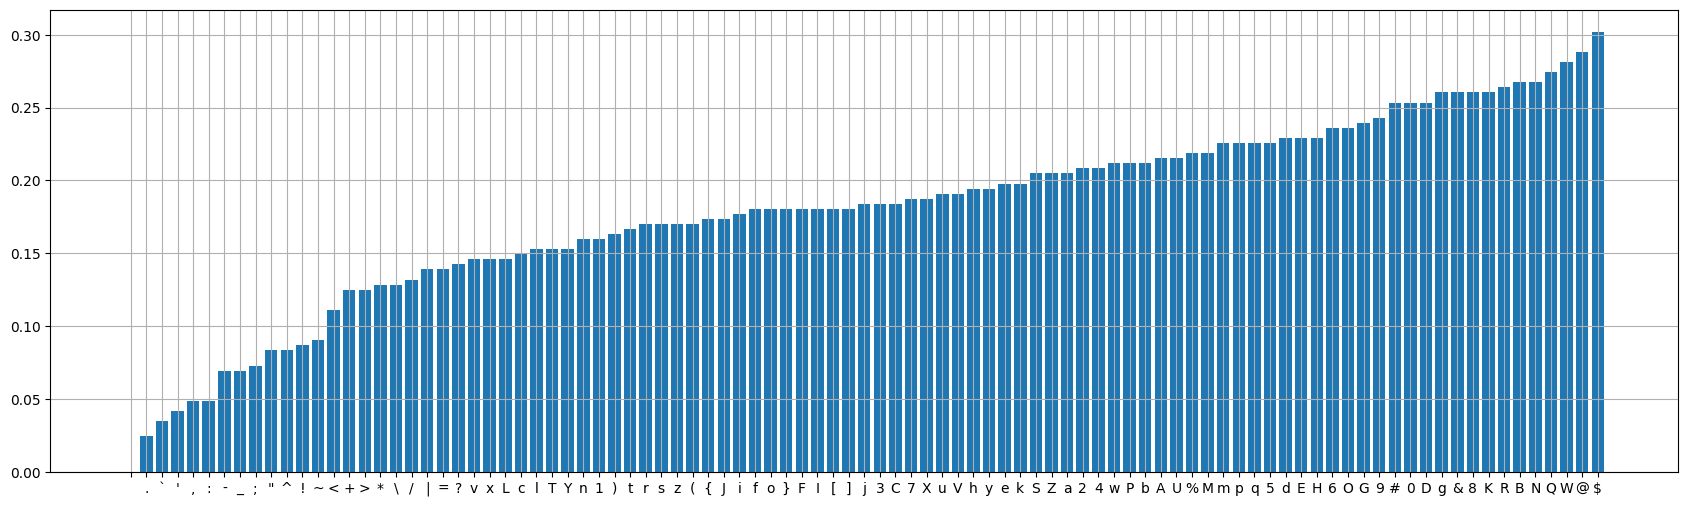

In [13]:
plt.figure(figsize=(21, 6))
plt.bar(list(brightness_str), fills)
plt.grid()

In [14]:
fills_neg = list(map(lambda a: 1 - a, fills))
fills_neg.reverse()
reversed_brightness_str = reversed(brightness_str)

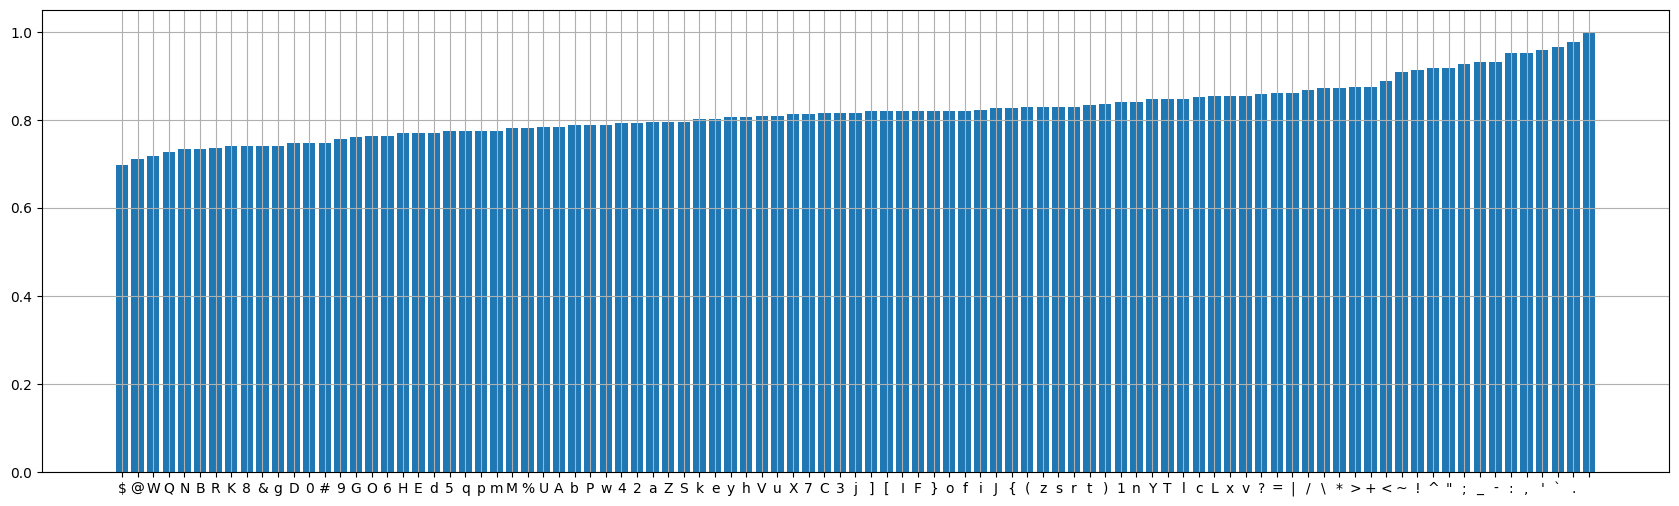

In [15]:
plt.figure(figsize=(21, 6))
plt.bar(list(reversed_brightness_str), fills_neg)
plt.grid()

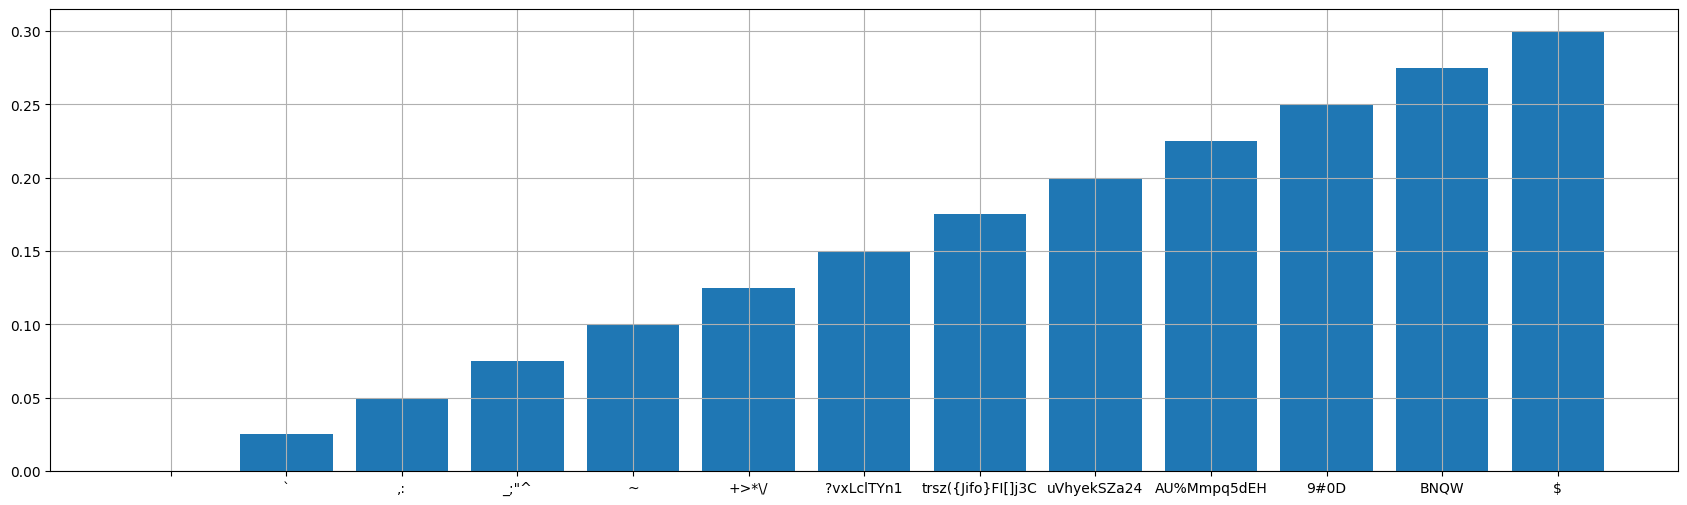

In [16]:
palette = [""]
palette_fills = [0]

f = 0
for a in img_ls:
    if abs(f - a[1]) <= 0.01:
        palette[-1] += a[2]
    
    if a[1] > f + 0.01:
        f += 0.025
        palette_fills.append(f)
        palette.append("")

plt.figure(figsize=(21, 6))
plt.bar(palette, palette_fills)
plt.grid()

In [17]:
palette = [' ', '.', ':', ';', '~', '+', 'Y', 's', '3', 'V', '4', 'A', 'H', '#', 'N', '@']

palette_fills = []
for a in img_ls:
    if a[2] in palette:
        palette_fills.append(a[1])


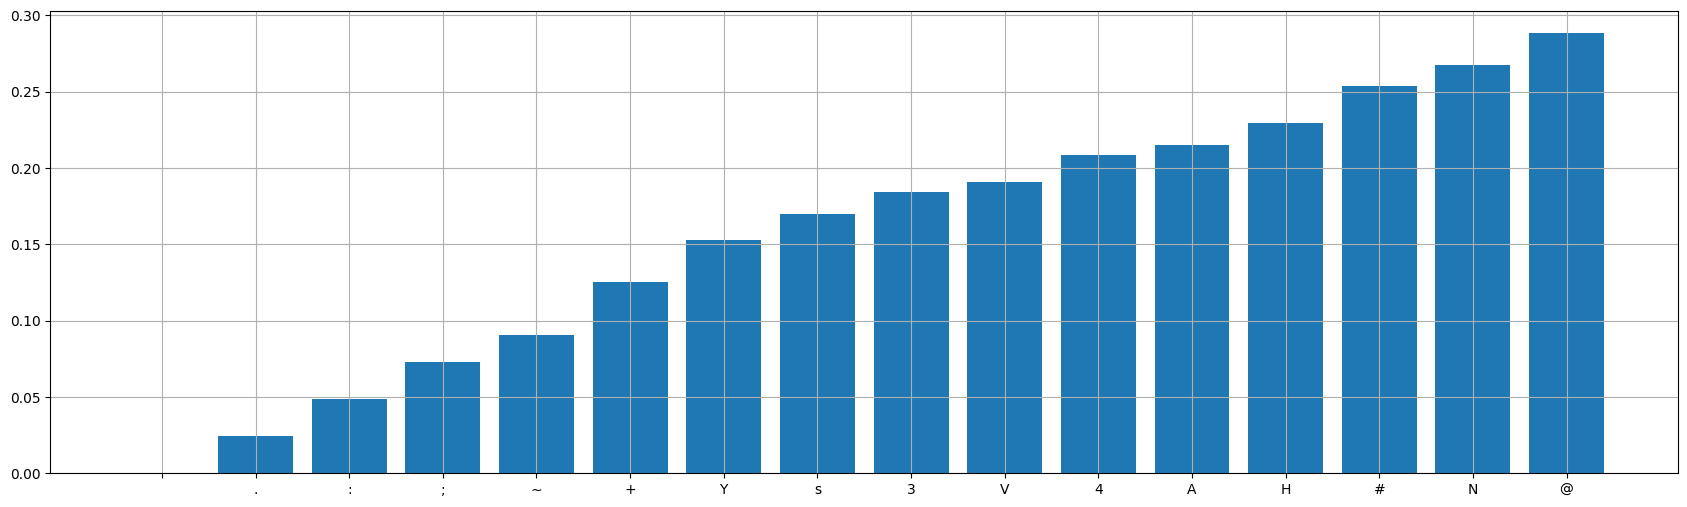

In [18]:
plt.figure(figsize=(21, 6))
plt.bar(palette, palette_fills)
plt.grid()

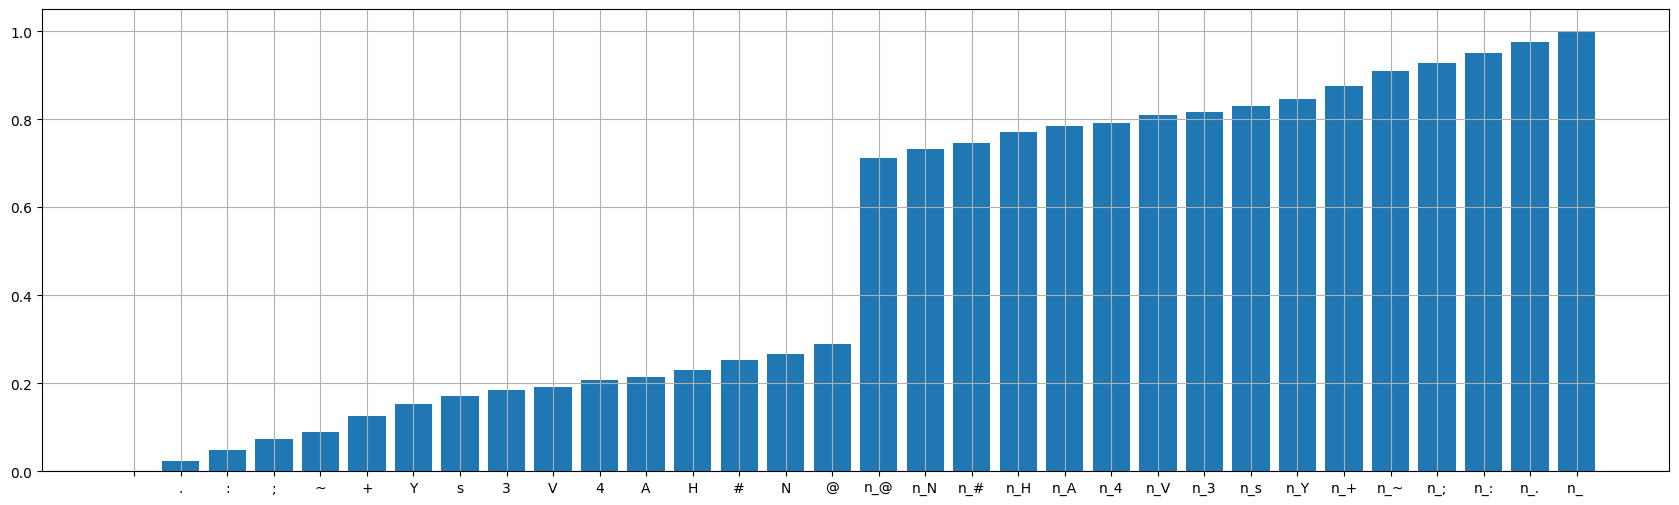

In [19]:
palette_with_neg = palette + list(map(lambda a: "n_" + a, reversed(palette)))
palette_fills_with_neg = palette_fills + list(map(lambda a: 1 - a, reversed(palette_fills)))

plt.figure(figsize=(21, 6))
plt.bar(palette_with_neg, palette_fills_with_neg)
plt.grid()